In [3]:
#importing  python Libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [9]:
#importing dataset
data = pd.read_excel('crop yield data sheet.xlsx', engine='openpyxl')
data

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
0,1230.0,80.0,28,80.0,24.0,20.0,12.0
1,480.0,60.0,36,70.0,20.0,18.0,8.0
2,1250.0,75.0,29,78.0,22.0,19.0,11.0
3,450.0,65.0,35,70.0,19.0,18.0,9.0
4,1200.0,80.0,27,79.0,22.0,19.0,11.0
...,...,...,...,...,...,...,...
104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
data.describe()

,Rain Fall (mm),Fertilizer,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,849.797980,67.808081,70.737374,21.131313,18.060606,9.050505
std,400.042676,10.028202,6.677079,1.951695,1.817254,1.965902
min,400.000000,50.000000,59.000000,18.000000,15.000000,5.500000
25%,450.000000,60.000000,65.000000,19.500000,16.000000,7.000000
50%,1150.000000,70.000000,71.000000,21.000000,19.000000,9.000000
75%,1237.500000,77.000000,77.000000,23.000000,19.000000,11.000000
max,1300.000000,80.000000,80.000000,25.000000,22.000000,12.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rain Fall (mm)  99 non-null     float64
 1   Fertilizer      99 non-null     float64
 2   Temperatue      100 non-null    object 
 3   Nitrogen (N)    99 non-null     float64
 4   Phosphorus (P)  99 non-null     float64
 5   Potassium (K)   99 non-null     float64
 6   Yeild (Q/acre)  99 non-null     float64
dtypes: float64(6), object(1)
memory usage: 6.1+ KB


In [13]:
data.columns

Index(['Rain Fall (mm)', 'Fertilizer', 'Temperatue', 'Nitrogen (N)',
       'Phosphorus (P)', 'Potassium (K)', 'Yeild (Q/acre)'],
      dtype='object')

In [14]:
data.isnull().sum()

Rain Fall (mm)    10
Fertilizer        10
Temperatue         9
Nitrogen (N)      10
Phosphorus (P)    10
Potassium (K)     10
Yeild (Q/acre)    10
dtype: int64

In [15]:
data['Temperatue'] = pd.to_numeric(data['Temperatue'], errors = 'coerce')

In [16]:
data['Temperatue'].dtypes

dtype('float64')

In [17]:
#drop the null values
for i in data.columns:
    if data[i].isnull().sum() / len(data)< 30:
        if i in data.columns:
            data[i].fillna(data[i].median(), inplace = True)
    else:
        data.drop(i, axis = 1, inplace = True)
data.isnull().sum()

Rain Fall (mm)    0
Fertilizer        0
Temperatue        0
Nitrogen (N)      0
Phosphorus (P)    0
Potassium (K)     0
Yeild (Q/acre)    0
dtype: int64

In [18]:
data.rename(columns = {'Yeild (Q/acre)': 'Yield', 'Rain Fall (mm)': 'RainFall', 'Phosphorus (P)' : 'Phosphorus'}, inplace = True)
data

,RainFall,Fertilizer,Temperatue,Nitrogen (N),Phosphorus,Potassium (K),Yield
0,1230.0,80.0,28.0,80.0,24.0,20.0,12.0
1,480.0,60.0,36.0,70.0,20.0,18.0,8.0
2,1250.0,75.0,29.0,78.0,22.0,19.0,11.0
3,450.0,65.0,35.0,70.0,19.0,18.0,9.0
4,1200.0,80.0,27.0,79.0,22.0,19.0,11.0
...,...,...,...,...,...,...,...
104,1150.0,70.0,29.0,71.0,21.0,19.0,9.0
105,1150.0,70.0,29.0,71.0,21.0,19.0,9.0
106,1150.0,70.0,29.0,71.0,21.0,19.0,9.0
107,1150.0,70.0,29.0,71.0,21.0,19.0,9.0


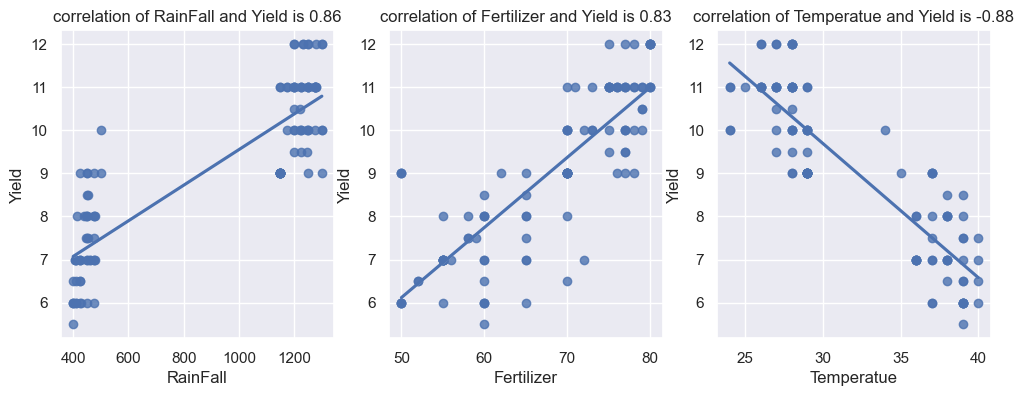

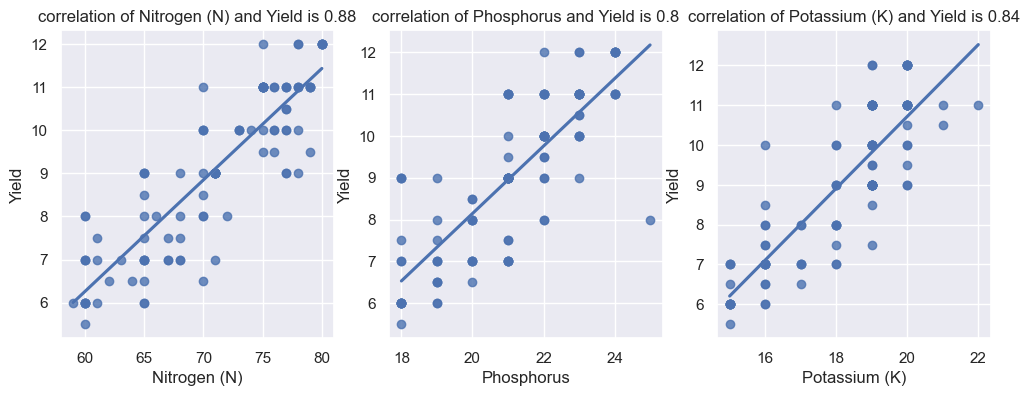

In [21]:
# DATA EXPLORATORY ANALYSIS 
def plotter(data, a, b, c, y):
    plt.figure(figsize = (12, 4))
    sns.set(style = 'darkgrid')

    plt.subplot(1, 3, 1)
    sns.regplot(x = data[a], y = data[y], ci = 0)
    plt.title(f"correlation of {a} and {y} is {data[a].corr(data[y]).round(2)}")

    plt.subplot(1, 3, 2)
    sns.regplot(x = data[b], y = data[y], ci = 0)
    plt.title(f"correlation of {b} and {y} is {data[b].corr(data[y]).round(2)}")

    plt.subplot(1, 3, 3)
    sns.regplot(x = data[c], y = data[y], ci = 0)
    plt.title(f"correlation of {c} and {y} is {data[c].corr(data[y]).round(2)}")

plotter(data,'RainFall', 'Fertilizer', 'Temperatue', 'Yield')
plotter(data, 'Nitrogen (N)', 'Phosphorus', 'Potassium (K)', 'Yield')

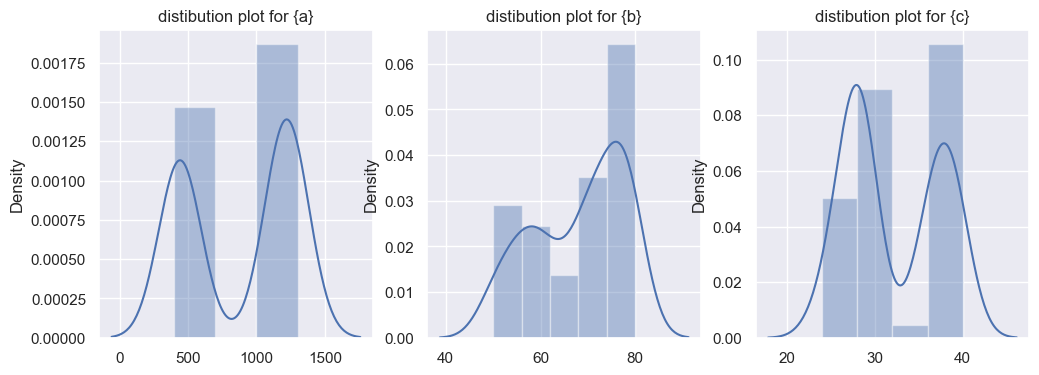

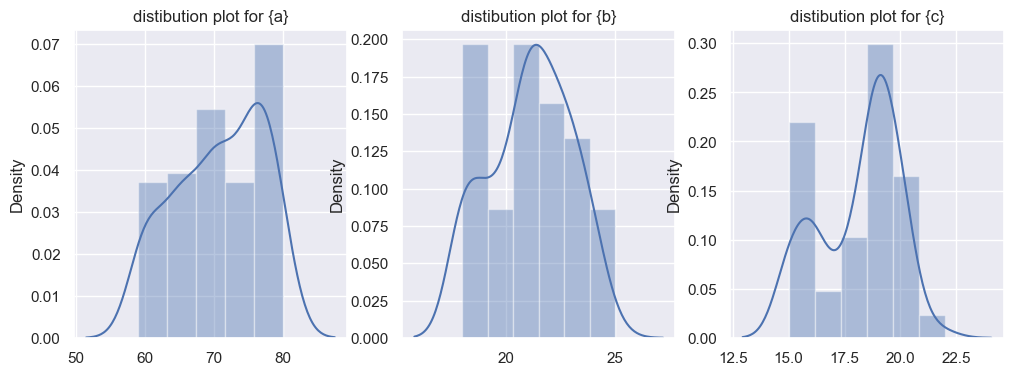

In [22]:
#Distribution plot for the variables 
def distplots(data,a, b, c):
    plt.figure(figsize = (12, 4))
    sns.set(style = 'darkgrid')
    
    plt.subplot(1, 3, 1)
    sns.distplot(x = data[a])
    plt.title('distibution plot for {a}')

    plt.subplot(1, 3, 2)
    sns.distplot(x = data[b])
    plt.title('distibution plot for {b}')

    plt.subplot(1, 3, 3)
    sns.distplot(x = data[c])
    plt.title('distibution plot for {c}')

distplots(data,'RainFall', 'Fertilizer', 'Temperatue')
distplots(data, 'Nitrogen (N)', 'Phosphorus', 'Potassium (K)')





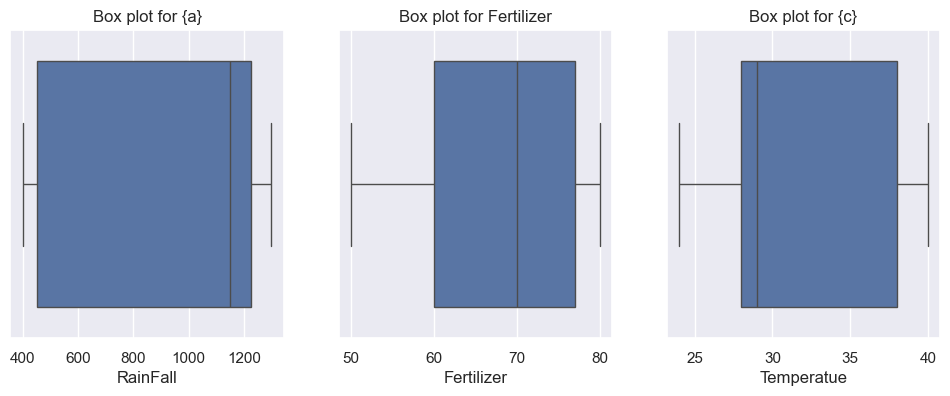

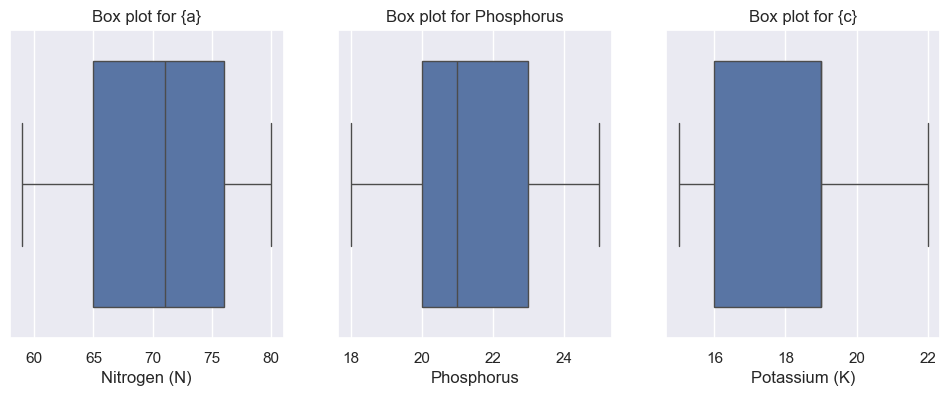

In [27]:
#Outlier check
def distplots(data,a, b, c):
    plt.figure(figsize = (12, 4))
    sns.set(style = 'darkgrid')
    
    plt.subplot(1, 3, 1)
    sns.boxplot(x = data[a])
    plt.title(f'Box plot for {a}')

    plt.subplot(1, 3, 2)
    sns.boxplot(x = data[b])
    plt.title(f'Box plot for {b}')

    plt.subplot(1, 3, 3)
    sns.boxplot(x = data[c])
    plt.title(f'Box plot for {c}')

distplots(data,'RainFall', 'Fertilizer', 'Temperatue')
distplots(data, 'Nitrogen (N)', 'Phosphorus', 'Potassium (K)')






<Axes: >

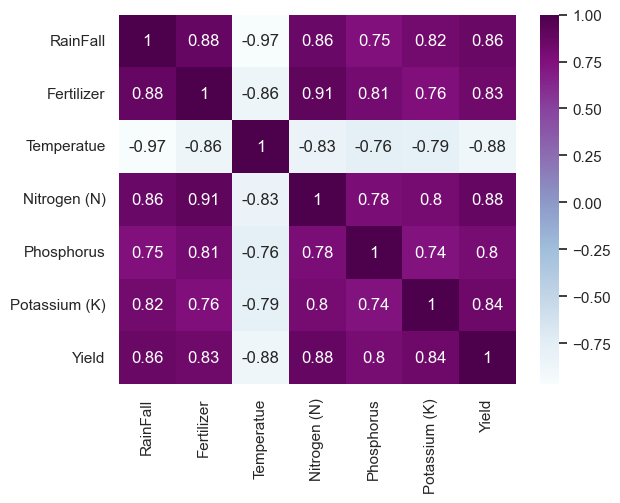

In [26]:
#MULTI-COLINEARITY
sns.heatmap(data.corr(), annot = True, cmap = 'BuPu')

In [28]:
#Model Evaluation
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

x = data.drop('Yield', axis = 1)
y = data['Yield']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=42)
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)
ypred = regressor.predict(xtrain)
print(r2_score(ypred, ytrain))

0.855558904628659


In [29]:
#Evaluation of the test result
test = regressor.predict(xtest)
print(r2_score(test, ytest))

0.8524392114860605


In [33]:
new_data = pd.concat([xtest.reset_index(drop = True), ytest.reset_index(drop = True)], axis = 1)
new_data['Predicted'] = pd.Series(test)
new_data

,RainFall,Fertilizer,Temperatue,Nitrogen (N),Phosphorus,Potassium (K),Yield,Predicted
0,1175.0,70.0,28.0,70.0,22.0,19.0,10.0,9.736328
1,1280.0,80.0,26.0,80.0,24.0,20.0,12.0,11.565315
2,1200.0,80.0,27.0,79.0,22.0,19.0,11.0,10.717411
3,1300.0,76.0,28.0,77.0,22.0,20.0,9.0,10.652093
4,1200.0,75.0,27.0,76.0,21.0,19.0,11.0,10.379098
5,1225.0,75.0,29.0,77.0,23.0,19.0,10.0,10.406099
6,1150.0,80.0,26.0,75.0,21.0,20.0,11.0,10.558037
7,460.0,55.0,38.0,61.0,20.0,18.0,7.0,7.331366
8,1220.0,79.0,28.0,77.0,23.0,21.0,10.5,11.042427
9,415.0,55.0,38.0,65.0,19.0,17.0,8.0,7.481158


In [34]:
#co-efficient and regressor

coefs = regressor.coef_
intercept = regressor.intercept_
(coefs, intercept)

(array([-0.000897  , -0.04474593, -0.1859298 ,  0.14055965,  0.14036325,
         0.31244838]),
 0.26487271488809583)

STATISTICAL INTERPRETATION<br>

y = bo + b1(X1) + b2(X2) + b3(X3) + b4(X4) + b5(x5) + b6(x6)<br>
Yield = bo + b1(Rainfall) + b2(Fertilizer) + b3(Temperature) + b4(Nitrogen) + b5(Phosphorus) +b6(Potassium)<br>

Yield = 0.264 - 0.000897(Rainfall) - 0.0447(Fertilizer) - 0.1859 (Temperature) + 0.1405(Nitrogen) +0.1403(Phosphorus) + 0.3124(Potassium)<br>

A 1% increase in Rainfall decrease Yield by 0.000089<br>
A 1% increase in Fertilizer decrease Yield by 0.0447<br>
A 1% increase in Temperature increase Yield by 0.1859<br>
A 1% increase in Nitrogen increase Yield by 0.1405<br>
A 1% increase in Phosphorus increase Yield by 0.1403<br>
A 1% increase in Potassium increase Yield by 0.3124

Text(0.5, 1.0, 'Homoscedacity of the Model')

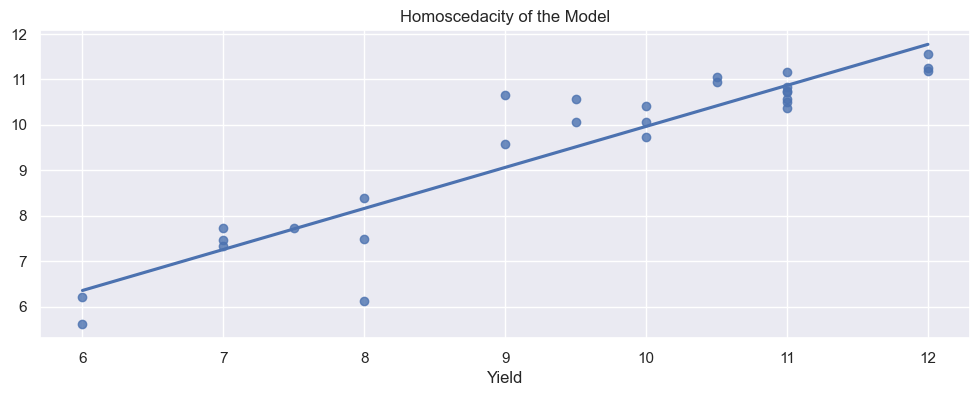

In [35]:
#Homoscedascity of the model
plt.figure(figsize =(12, 4))
sns.regplot(y = test, x = ytest, ci = 0)
plt.title('Homoscedacity of the Model')

In [37]:
import joblib
joblib.dump(regressor, open('cropModel.pkl', 'wb'))